In [1]:
!pip install nltk
!pip install wordcloud
!pip install spacy
!pip install eng-spacysentiment
!pip install textblob
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.6 MB/s eta 0:00:00
  Created wheel for eng-spacysentiment: filename=eng_spacysentiment-2.3.0-py3-none-any.whl size=1342134 sha256=3f1615b8920a3b0fb2bf6d555b2c2f54e2880dd524041d3a0a5f9f57b3ea6178
  Stored in directory: /root/.cache/pip/wheels/c7/85/4a/f6db06d341f4006864e5fa940b473acb2987c8e0111f8a4642
Successfully built eng-spacysentiment
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
  

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk import download
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import numpy as np

In [4]:
from nltk import Text as nltk_text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import eng_spacysentiment

nlp = spacy.load('en_core_web_sm')

from textblob import TextBlob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from pymystem3 import Mystem

In [6]:
from pprint import pprint

In [42]:
new_stopwords = ['AI','intelligence', 'mit', 'MIT', 'robots', 'machine', 'learning', 'computer', 'model', 'datum', 'make','say', 'use',
                 'one', 'system', 'work', 'technology', 'take', 'news', 'fox', 'n', 'making', 'ai', 'artificial','robot','robotic','q',
                 'says','could', 'models','data', 'may', 'using','computing', 'â']

In [43]:
stop_words = stopwords.words('english')

In [45]:
stop_words = set(stop_words)

In [46]:
super_stop_words = stop_words.union(new_stopwords)

In [47]:
def clean_text(text_str, stop_words):
  text_str = text_str.lower()
  text_list_nltk = word_tokenize(text_str)
  text_clean = [word for word in text_list_nltk if word not in super_stop_words and word[0].isalpha()]
  return text_clean

**Анализ заголовков статей The Economist и BBC**

In [48]:
with open('Media_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [49]:
full_Media_headers_text = clean_text(text, super_stop_words)
pprint(full_Media_headers_text[:100])

['headers',
 'britain',
 'dreams',
 'reality',
 'race',
 'labs',
 'heats',
 'fortify',
 'big',
 'business',
 'upend',
 'generative',
 'destroys',
 'biometric',
 'security',
 'generative',
 'generates',
 'tricky',
 'choices',
 'managers',
 'battle',
 'royal',
 'brewing',
 'copyright',
 'would',
 'humans',
 'world',
 'super-ai',
 'talking',
 'human',
 'terms',
 'natural—but',
 'wrong',
 'two',
 'experts',
 'predict',
 'transform',
 'companies',
 'understanding',
 'authors',
 'collaborating',
 'ai—and',
 'change',
 'culture',
 'course',
 'history',
 'less',
 'necessary',
 'learn',
 'foreign',
 'languages',
 'write',
 'sing',
 'act',
 'still',
 'possible',
 'star',
 'benefits',
 'outweigh',
 'risks',
 'china',
 'push',
 'worrying',
 'lego-lover',
 'guide',
 'preparing',
 'age',
 'carl',
 'benedikt',
 'frey',
 'michael',
 'osborne',
 'benefits',
 'lower-skilled',
 'workers',
 'catalogue',
 'forest',
 'inhabitants',
 'simply',
 'listening',
 'new',
 'frontier',
 'europe',
 'laggard',
 'seize

In [50]:
nlp = spacy.load("en_core_web_sm")

spacy_token_Media_h = []
for i in full_Media_headers_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_Media_h.append(' '.join(sent))

In [51]:
spacy_token_Media_h

['header',
 'britain',
 'dream',
 'reality',
 'race',
 'lab',
 'heat',
 'fortify',
 'big',
 'business',
 'upend',
 'generative',
 'destroy',
 'biometric',
 'security',
 'generative',
 'generate',
 'tricky',
 'choice',
 'manager',
 'battle',
 'royal',
 'brew',
 'copyright',
 'would',
 'human',
 'world',
 'super ai',
 'talk',
 'human',
 'term',
 'natural — but',
 'wrong',
 'two',
 'expert',
 'predict',
 'transform',
 'company',
 'understand',
 'author',
 'collaborate',
 'ai — and',
 'change',
 'culture',
 'course',
 'history',
 'less',
 'necessary',
 'learn',
 'foreign',
 'language',
 'write',
 'sing',
 'act',
 'still',
 'possible',
 'star',
 'benefit',
 'outweigh',
 'risk',
 'china',
 'push',
 'worry',
 'lego lover',
 'guide',
 'prepare',
 'age',
 'carl',
 'benedikt',
 'frey',
 'michael',
 'osborne',
 'benefit',
 'lower skilled',
 'worker',
 'catalogue',
 'forest',
 'inhabitant',
 'simply',
 'listen',
 'new',
 'frontier',
 'europe',
 'laggard',
 'seize',
 'lead',
 'regulation',
 'need',

In [52]:
len(spacy_token_Media_h)

1417

**Подсчёт наиболее частотных слов, биграмм, построение облака слов**

In [53]:
from collections import Counter

In [54]:
Counter(spacy_token_Media_h).most_common(50)

[('new', 16),
 ('help', 16),
 ('tech', 10),
 ('use', 10),
 ('uk', 9),
 ('world', 8),
 ('want', 8),
 ('google', 8),
 ('big', 7),
 ('air', 7),
 ('job', 7),
 ('election', 7),
 ('firm', 7),
 ('generative', 6),
 ('human', 6),
 ('transform', 6),
 ('need', 6),
 ('get', 6),
 ('fake', 6),
 ('phone', 6),
 ('plan', 6),
 ('future', 6),
 ('aid', 6),
 ('aim', 6),
 ('find', 5),
 ('become', 5),
 ('nvidia', 5),
 ('concern', 5),
 ('go', 5),
 ('film', 5),
 ('industry', 5),
 ('microsoft', 5),
 ('turn', 5),
 ('we', 5),
 ('cancer', 5),
 ('airport', 5),
 ('china', 4),
 ('age', 4),
 ('scientist', 4),
 ('life', 4),
 ('develop', 4),
 ('like', 4),
 ('police', 4),
 ('game', 4),
 ('think', 4),
 ('test', 4),
 ('instagram', 4),
 ('search', 4),
 ('save', 4),
 ('camera', 4)]

In [55]:
frequencies_list = nltk.FreqDist(spacy_token_Media_h)

word_freq = dict((word, freq) for word, freq in frequencies_list.items() if not word.isdigit())

print(word_freq)

frequencies_list.most_common(50)

{'header': 2, 'britain': 3, 'dream': 2, 'reality': 2, 'race': 2, 'lab': 1, 'heat': 2, 'fortify': 1, 'big': 7, 'business': 3, 'upend': 1, 'generative': 6, 'destroy': 1, 'biometric': 1, 'security': 1, 'generate': 1, 'tricky': 1, 'choice': 1, 'manager': 1, 'battle': 2, 'royal': 1, 'brew': 1, 'copyright': 1, 'would': 1, 'human': 6, 'world': 8, 'super ai': 1, 'talk': 1, 'term': 1, 'natural — but': 1, 'wrong': 1, 'two': 2, 'expert': 3, 'predict': 1, 'transform': 6, 'company': 3, 'understand': 1, 'author': 1, 'collaborate': 1, 'ai — and': 1, 'change': 1, 'culture': 1, 'course': 3, 'history': 2, 'less': 1, 'necessary': 1, 'learn': 2, 'foreign': 1, 'language': 2, 'write': 1, 'sing': 1, 'act': 1, 'still': 1, 'possible': 1, 'star': 3, 'benefit': 3, 'outweigh': 1, 'risk': 3, 'china': 4, 'push': 1, 'worry': 3, 'lego lover': 1, 'guide': 1, 'prepare': 1, 'age': 4, 'carl': 1, 'benedikt': 1, 'frey': 1, 'michael': 1, 'osborne': 1, 'lower skilled': 1, 'worker': 3, 'catalogue': 1, 'forest': 1, 'inhabitant

[('new', 16),
 ('help', 16),
 ('tech', 10),
 ('use', 10),
 ('uk', 9),
 ('world', 8),
 ('want', 8),
 ('google', 8),
 ('big', 7),
 ('air', 7),
 ('job', 7),
 ('election', 7),
 ('firm', 7),
 ('generative', 6),
 ('human', 6),
 ('transform', 6),
 ('need', 6),
 ('get', 6),
 ('fake', 6),
 ('phone', 6),
 ('plan', 6),
 ('future', 6),
 ('aid', 6),
 ('aim', 6),
 ('find', 5),
 ('become', 5),
 ('nvidia', 5),
 ('concern', 5),
 ('go', 5),
 ('film', 5),
 ('industry', 5),
 ('microsoft', 5),
 ('turn', 5),
 ('we', 5),
 ('cancer', 5),
 ('airport', 5),
 ('china', 4),
 ('age', 4),
 ('scientist', 4),
 ('life', 4),
 ('develop', 4),
 ('like', 4),
 ('police', 4),
 ('game', 4),
 ('think', 4),
 ('test', 4),
 ('instagram', 4),
 ('search', 4),
 ('save', 4),
 ('camera', 4)]

**График наиболее частотных слов**

In [56]:
def plot_word_frequency(words,top_n=10):
    word_freq = nltk.FreqDist(spacy_token_Media_h)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(50, 5))
    plt.title("Самые частые слова в корпусе")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(x=labels, y=counts)
    return plot

<Axes: title={'center': 'Самые частые слова в корпусе'}, xlabel='Word', ylabel='Count'>

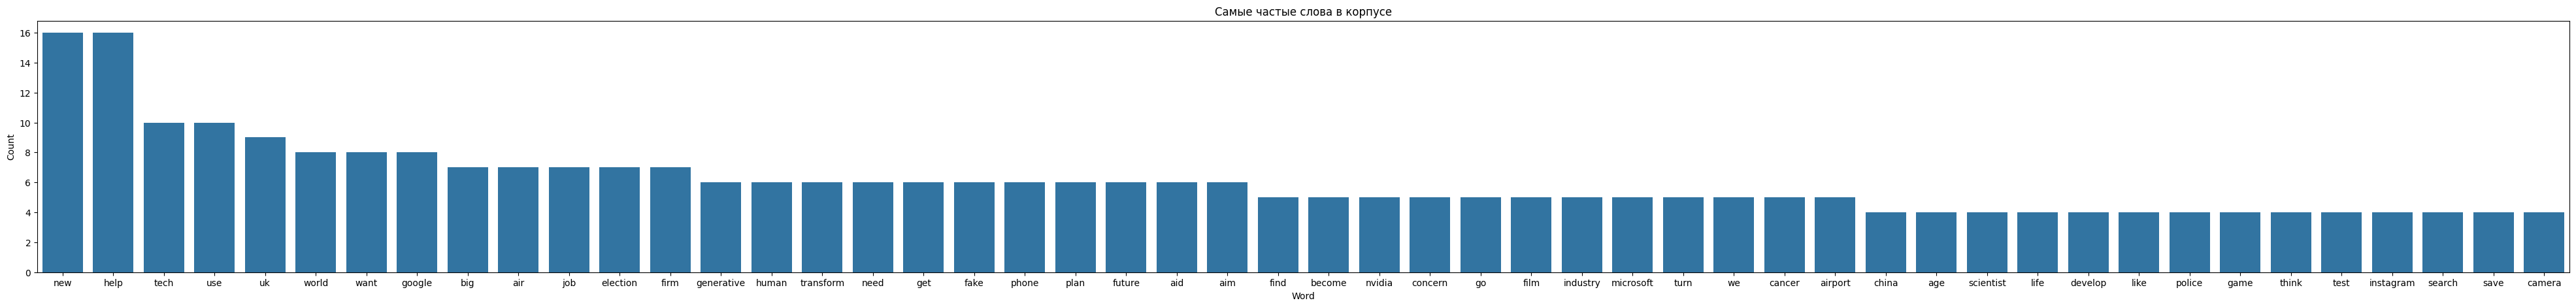

In [57]:
plot_word_frequency(spacy_token_Media_h,50)

**Облако слов**

In [58]:
from wordcloud import WordCloud
%matplotlib inline

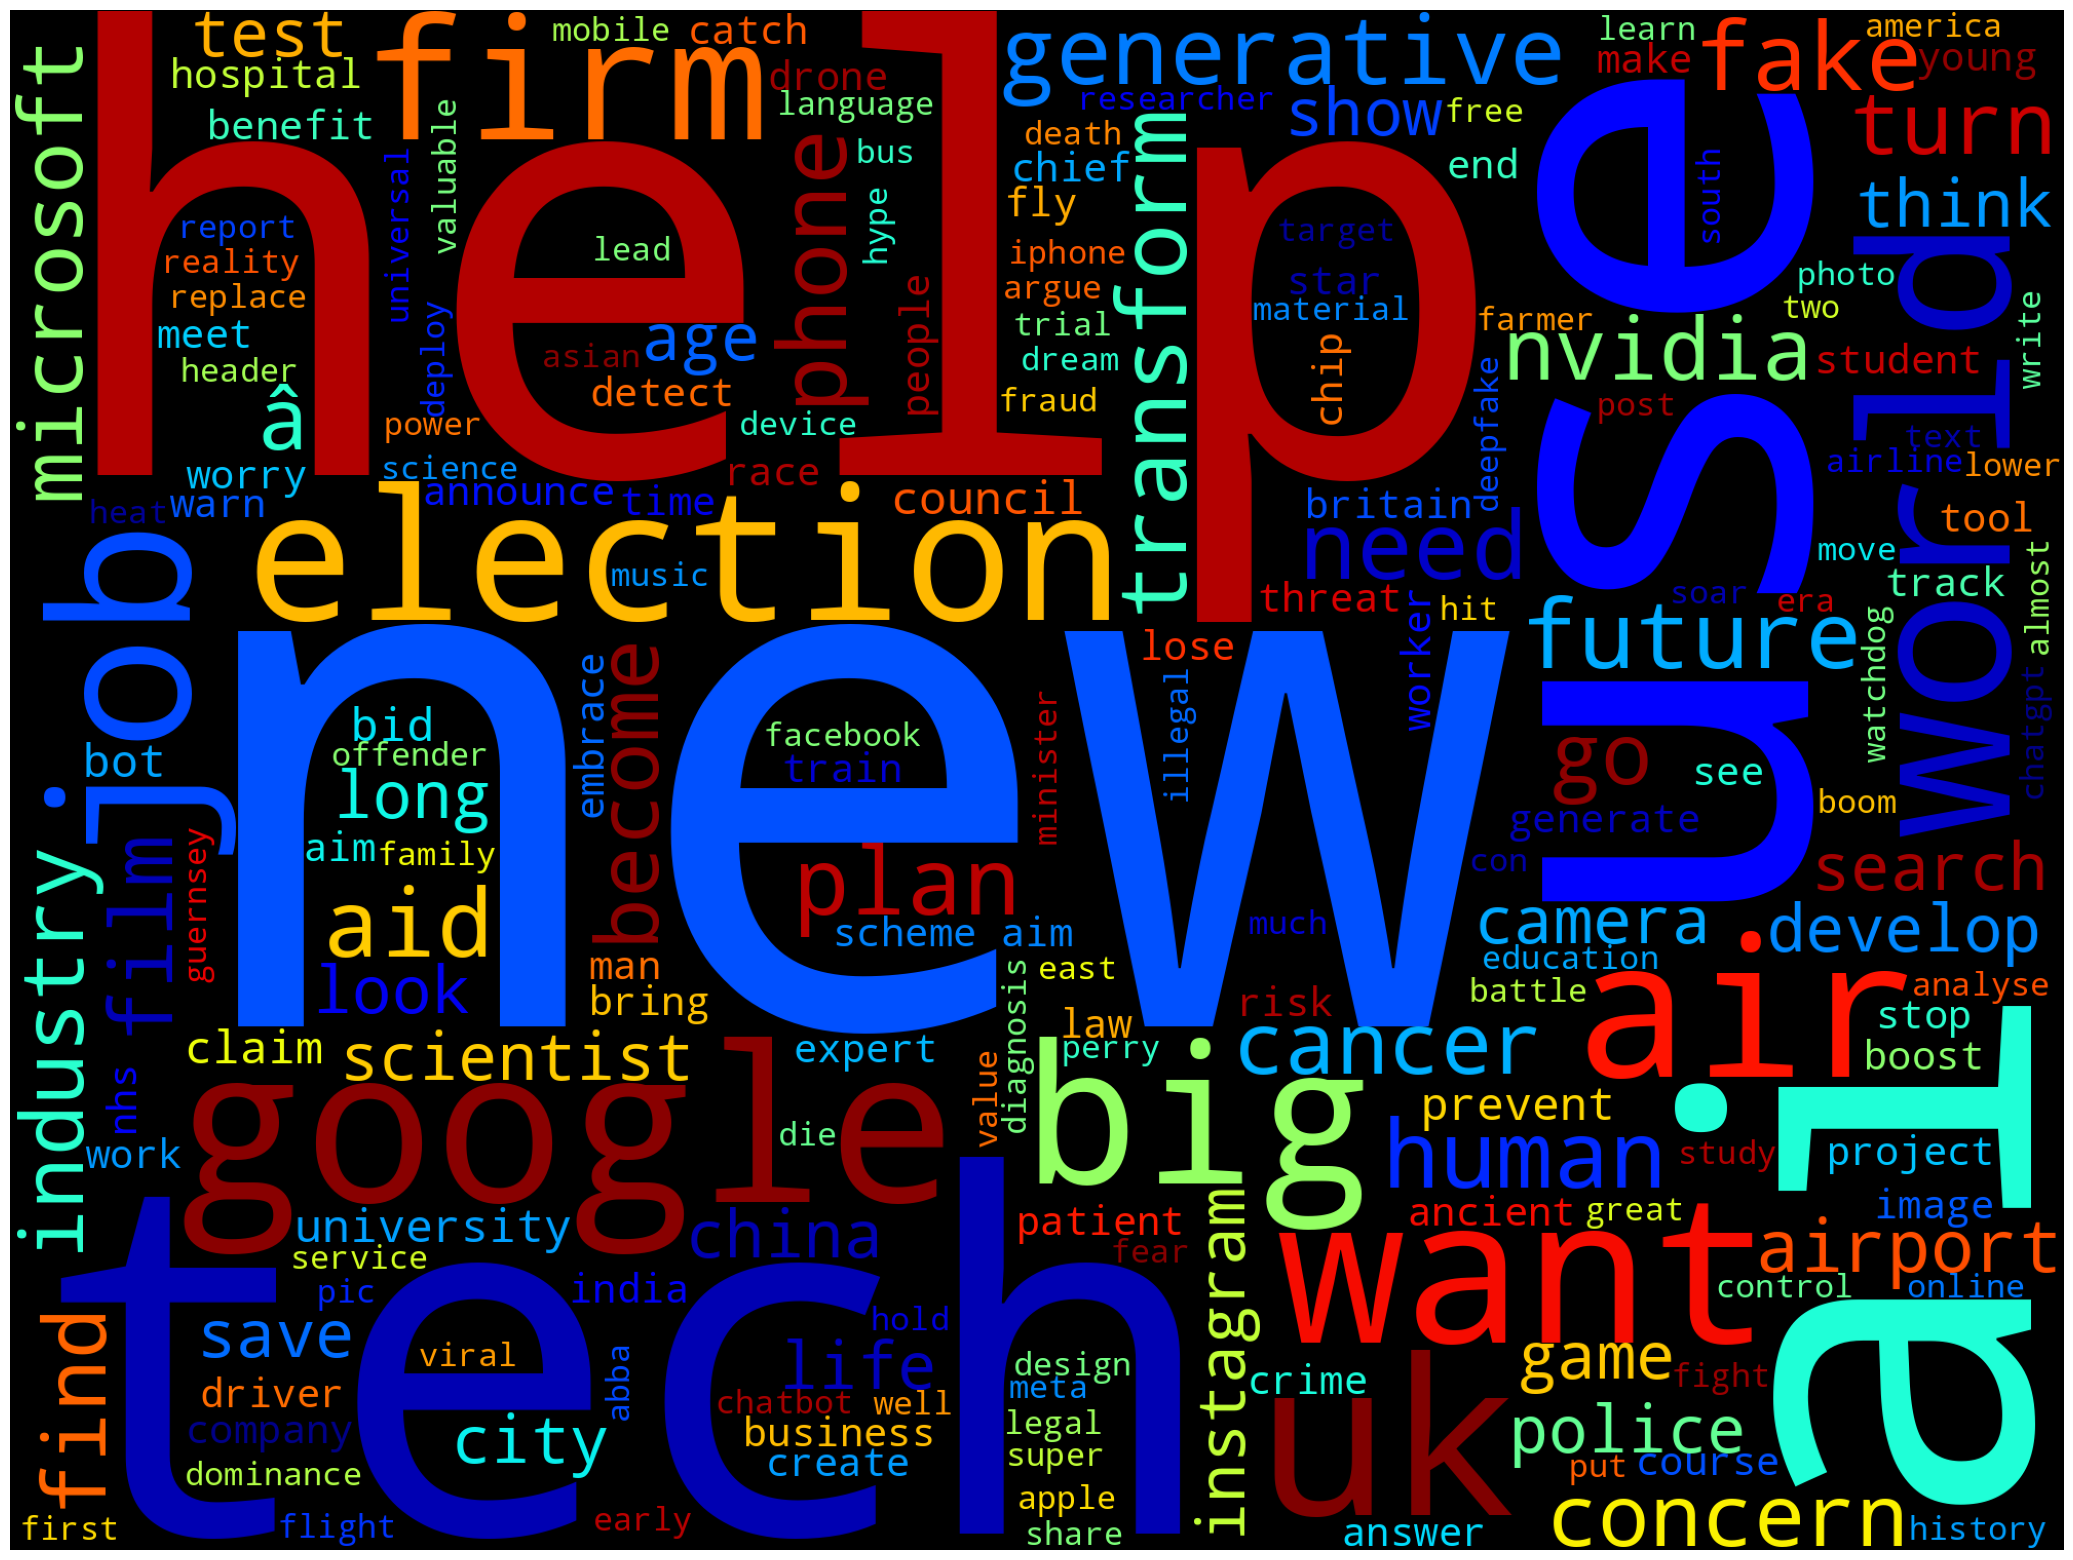

In [59]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='jet').generate(', '.join(spacy_token_Media_h))
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Биграммы**

In [60]:
freq_bigramms = Counter(nltk.bigrams(spacy_token_Media_h))
freq_bigramms.most_common(10)

[(('big', 'tech'), 3),
 (('scheme', 'aim'), 3),
 (('two', 'expert'), 2),
 (('help', 'find'), 2),
 (('henry', 'farrell'), 2),
 (('tech', 'firm'), 2),
 (('facebook', 'instagram'), 2),
 (('develop', 'detect'), 2),
 (('go', 'viral'), 2),
 (('industry', 'embrace'), 2)]

In [61]:
freq_bigramms = Counter(nltk.bigrams(full_Media_headers_text))
freq_bigramms.most_common(10)

[(('big', 'tech'), 3),
 (('two', 'experts'), 2),
 (('henry', 'farrell'), 2),
 (('facebook', 'instagram'), 2),
 (('go', 'viral'), 2),
 (('helping', 'prevent'), 2),
 (('microsoft', 'announces'), 2),
 (('scheme', 'aims'), 2),
 (('tool', 'aid'), 2),
 (('election', 'disinformation'), 2)]

**Выявление коллокаций (PMI, log-likelihood, tf-idf)**

In [62]:
def sentenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

def normalize(text):
    doc = nlp(text)
    list_of_lemmas = ' '.join([tok.lemma_ for tok in doc])
    tokens = re.findall('[a-zA-Z0-9]+', list_of_lemmas.lower())
    normalized_text = [word for word in tokens if len(word) > 2 and word not in super_stop_words]

    return normalized_text

def preprocess(text):
    sents = sentenize(text)
    return [normalize(sent) for sent in sents]

In [63]:
with open('Media_headers.txt', encoding='utf-8') as text:
    corpus = text.read()

In [64]:
corpus = preprocess(corpus)

In [65]:
corpus

[['header',
  'britain',
  'dream',
  'reality',
  'race',
  'lab',
  'heat',
  'fortify',
  'big',
  'business',
  'upend',
  'generative',
  'destroy',
  'biometric',
  'security',
  'generative',
  'generate',
  'tricky',
  'choice',
  'manager',
  'battle',
  'royal',
  'brew',
  'copyright'],
 ['would',
  'human',
  'world',
  'super',
  'talk',
  'human',
  'term',
  'natural',
  'wrong',
  'two',
  'expert',
  'predict',
  'transform',
  'company',
  'understanding',
  'author',
  'collaborate',
  'change',
  'culture',
  'course',
  'history',
  'less',
  'necessary',
  'learn',
  'foreign',
  'language',
  'write',
  'sing',
  'act',
  'still',
  'possible',
  'star'],
 ['benefit', 'outweigh', 'risk'],
 ['china',
  'push',
  'worry',
  'lego',
  'lover',
  'guide',
  'prepare',
  'age',
  'carl',
  'benedikt',
  'frey',
  'michael',
  'osborne',
  'benefit',
  'lower',
  'skilled',
  'worker',
  'catalogue',
  'forest',
  'inhabitant',
  'simply',
  'listen',
  'new',
  'front

In [66]:
def ngrammer(tokens, stops, n=2):
    ngrams = []
    tokens = [token for token in tokens if token not in super_stop_words]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

In [67]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))

    except ZeroDivisionError:
        return 0

    return score

def collect_stats(corpus, stops):

    unigrams = Counter()
    bigrams = Counter()

    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, super_stop_words, 2))

    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=1):
    bigram2score = Counter()
    len_vocab = len(unigrams)
    for bigram in bigrams:
        score = scorer(unigrams[bigram[0]], unigrams[bigram[1]],
                       bigrams[bigram], len_vocab, min_count)

        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

In [73]:
unigrams, bigrams = collect_stats(corpus, super_stop_words)

In [74]:
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)
bigram2score
bigram2score.most_common(20)

[(('destroy', 'biometric'), 0.5),
 (('biometric', 'security'), 0.5),
 (('tricky', 'choice'), 0.5),
 (('choice', 'manager'), 0.5),
 (('royal', 'brew'), 0.5),
 (('brew', 'copyright'), 0.5),
 (('term', 'natural'), 0.5),
 (('natural', 'wrong'), 0.5),
 (('understanding', 'author'), 0.5),
 (('author', 'collaborate'), 0.5),
 (('collaborate', 'change'), 0.5),
 (('change', 'culture'), 0.5),
 (('less', 'necessary'), 0.5),
 (('sing', 'act'), 0.5),
 (('act', 'still'), 0.5),
 (('still', 'possible'), 0.5),
 (('lego', 'lover'), 0.5),
 (('lover', 'guide'), 0.5),
 (('guide', 'prepare'), 0.5),
 (('carl', 'benedikt'), 0.5)]

In [75]:
from collections import defaultdict
def get_window_stats(texts, window=4):

    bigrams = defaultdict(list)

    for text in texts:
        for i in range(len(text)-window):
            words = list(enumerate(text[i:i+window]))
            target = words[0][1]
            for j, word in words[1:]:
                bigrams[(target, word)].append(j)

    bigrams_stds = Counter()
    for bigram in bigrams:
        if len(bigrams[bigram]) > 2:
            bigrams_stds[bigram] = np.std(bigrams[bigram])

    return bigrams_stds

In [76]:
get_window_stats(corpus)

Counter({('big', 'tech'): 0.0, ('scheme', 'aim'): 0.0})

In [77]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

In [78]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [79]:
finder = BigramCollocationFinder.from_documents(corpus)

In [80]:
finder.nbest(bigram_measures.likelihood_ratio, 20)

[('scheme', 'aim'),
 ('disinformation', 'tell'),
 ('henry', 'farrell'),
 ('tell', 'bbc'),
 ('two', 'expert'),
 ('facebook', 'instagram'),
 ('election', 'disinformation'),
 ('supercharge', 'election'),
 ('big', 'tech'),
 ('develop', 'detect'),
 ('world', 'super'),
 ('industry', 'embrace'),
 ('microsoft', 'announce'),
 ('driver', 'phone'),
 ('fake', 'image'),
 ('tool', 'aid'),
 ('200', '000'),
 ('2029', 'bedfordshire'),
 ('2tn', 'tyler'),
 ('3bn', 'centre')]

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
texts = [' '.join(sent) for sent in corpus]

In [83]:
tfidf = TfidfVectorizer(min_df=2, max_df=50, max_features=1000,
                       ngram_range=(2,2))

In [84]:
tfidf.fit(texts)

TfidfVectorizer(max_df=50, max_features=1000, min_df=2, ngram_range=(2, 2))

In [85]:
tfidf.vocabulary_

{'world super': 14,
 'two expert': 13,
 'henry farrell': 7,
 'big tech': 1,
 'tech firm': 11,
 'facebook instagram': 4,
 'develop detect': 2,
 'industry embrace': 8,
 'driver phone': 3,
 'help prevent': 6,
 'microsoft announce': 9,
 'announce new': 0,
 'scheme aim': 10,
 'fake image': 5,
 'tool aid': 12}

**Выделение прилагательных и наречий**

In [86]:
from nltk import pos_tag

In [87]:
with open('Media_headers.txt', 'r', encoding='utf-8') as file:
        text = file.read()

In [88]:
words = word_tokenize(text)

pos_tagged = pos_tag(words)

adjectives = [word for (word, pos) in pos_tagged if pos in ['JJ', 'JJR', 'JJS']]

In [89]:
pprint(Counter(adjectives).most_common(50))

[('new', 12),
 ('artificial', 5),
 ('big', 4),
 ('human', 4),
 ('s', 3),
 ('fake', 3),
 ('generative', 2),
 ('valuable', 2),
 ('AI-generated', 2),
 ('great', 2),
 ('legal', 2),
 ('chief', 2),
 ('viral', 2),
 ('first', 2),
 ('future', 2),
 ('illegal', 2),
 ('Asian', 2),
 ('more', 2),
 ('due', 2),
 ('ancient', 2),
 ('biometric', 1),
 ('tricky', 1),
 ('natural—but', 1),
 ('wrong', 1),
 ('other', 1),
 ('less', 1),
 ('necessary', 1),
 ('foreign', 1),
 ('possible', 1),
 ('Lego-lover', 1),
 ('AI', 1),
 ('lower-skilled', 1),
 ('Artificial', 1),
 ('frontier', 1),
 ('social', 1),
 ('religious', 1),
 ('Generative', 1),
 ('last', 1),
 ('tech', 1),
 ('red', 1),
 ('unknown', 1),
 ('“', 1),
 ('widespread', 1),
 ('Chief', 1),
 ('scramble', 1),
 ('good', 1),
 ('safe', 1),
 ('classical', 1),
 ('familiar-looking', 1),
 ('international', 1)]


In [90]:
adverbs = [word for (word, pos) in pos_tagged if pos in ['RB', 'RBR', 'RBS']]

In [91]:
pprint(Counter(adverbs).most_common(50))

[('not', 10),
 ('more', 3),
 ('much', 2),
 ('almost', 2),
 ("n't", 2),
 ('Now', 1),
 ('still', 1),
 ('simply', 1),
 ('wisely', 1),
 ('long', 1),
 ('radically', 1),
 ('quite', 1),
 ('probably', 1),
 ('mainstream', 1),
 ('yet', 1),
 ('as', 1),
 ('well', 1),
 ('most', 1),
 ('earlier', 1),
 ('closer', 1),
 ('easily', 1),
 ('nearly', 1),
 ('rifle', 1),
 ('no', 1),
 ('longer', 1),
 ('once', 1),
 ('silly', 1)]


**Анализ тональности**

In [92]:
with open('Media_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

text = text.split('\n')
text

['headers',
 'How to make Britain’s AI dreams reality',
 'The race of the AI labs heats up',
 'AI could fortify big business, not upend it',
 'What if generative AI destroys biometric security?',
 'Generative AI generates tricky choices for managers ',
 'A battle royal is brewing over copyright and AI',
 'What would humans do in a world of super-AI?',
 'Talking about AI in human terms is natural—but wrong',
 'Two experts predict AI will transform companies’ understanding of themselves',
 'Authors are collaborating with AI—and each other',
 'How AI could change computing, culture and the course of history',
 'AI could make it less necessary to learn foreign languages',
 'Now AI can write, sing and act, is it still possible to be a star?',
 'Do the benefits of artificial intelligence outweigh the risks?',
 'Why China’s AI push is worrying',
 'A Lego-lover’s guide to preparing for the AI age ',
 'Carl Benedikt Frey and Michael Osborne on how AI benefits lower-skilled workers',
 'AI can ca

In [93]:
def get_clean_tokens(text):
  text = text.lower()
  text_tokens = word_tokenize(text)
  clean_tokens = []
  for i in text_tokens:
    if i[0].isalpha() and i not in stop_words:
      clean_tokens.append(i)
  return clean_tokens

clean_text = []
for i in text:
  sent = get_clean_tokens(i)
  clean_text.append(' '.join(sent))
clean_text

['headers',
 'make britain ai dreams reality',
 'race ai labs heats',
 'ai could fortify big business upend',
 'generative ai destroys biometric security',
 'generative ai generates tricky choices managers',
 'battle royal brewing copyright ai',
 'would humans world super-ai',
 'talking ai human terms natural—but wrong',
 'two experts predict ai transform companies understanding',
 'authors collaborating ai—and',
 'ai could change computing culture course history',
 'ai could make less necessary learn foreign languages',
 'ai write sing act still possible star',
 'benefits artificial intelligence outweigh risks',
 'china ai push worrying',
 'lego-lover guide preparing ai age',
 'carl benedikt frey michael osborne ai benefits lower-skilled workers',
 'ai catalogue forest inhabitants simply listening',
 'artificial intelligence new frontier',
 'europe laggard ai seizes lead regulation',
 'need focus social effects ai says nicholas christakis',
 'scientists using artificial intelligence',

In [94]:
nlp = spacy.load("en_core_web_sm")

spacy_token_Media_hs = []
for i in clean_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_Media_hs.append(' '.join(sent))

In [95]:
spacy_token_Media_hs

['header',
 'make britain ai dream reality',
 'race ai lab heat',
 'ai could fortify big business upend',
 'generative ai destroy biometric security',
 'generative ai generate tricky choice manager',
 'battle royal brewing copyright ai',
 'would human world super ai',
 'talk ai human term natural — but wrong',
 'two expert predict ai transform company understand',
 'author collaborate ai — and',
 'ai could change compute culture course history',
 'ai could make less necessary learn foreign language',
 'ai write sing act still possible star',
 'benefit artificial intelligence outweigh risk',
 'china ai push worry',
 'lego lover guide prepare ai age',
 'carl benedikt frey michael osborne ai benefit lower skilled worker',
 'ai catalogue forest inhabitant simply listen',
 'artificial intelligence new frontier',
 'europe laggard ai seize lead regulation',
 'need focus social effect ai say nicholas christakis',
 'scientist use artificial intelligence',
 'could ai help find valuable mineral d

In [96]:
df = pd.DataFrame(spacy_token_Media_hs[1:], columns=['header'])
df

,header
0,make britain ai dream reality
1,race ai lab heat
2,ai could fortify big business upend
3,generative ai destroy biometric security
4,generative ai generate tricky choice manager
...,...
269,community rally aid closure threat church
270,bollywood ai may affect india vast film industry
271,city aim become uk sculpture capital
272,bedfordshire police use ai save hour admin duty


**Sentiment analysis с помощью spacy**

In [97]:
nlp = eng_spacysentiment.load()

spacy_pos = []
spacy_neg = []
for i in df.header:
  doc = nlp(i)
  spacy_pos.append(round(doc.cats['positive'], 5))
  spacy_neg.append(round(doc.cats['negative'], 5))

df['spacy_pos'] = spacy_pos
df['spacy_neg'] = spacy_neg
df

,header,spacy_pos,spacy_neg
0,make britain ai dream reality,0.20713,0.09338
1,race ai lab heat,0.33782,0.31452
2,ai could fortify big business upend,0.33405,0.17120
3,generative ai destroy biometric security,0.53482,0.26008
4,generative ai generate tricky choice manager,0.68232,0.13705
...,...,...,...
269,community rally aid closure threat church,0.07044,0.57244
270,bollywood ai may affect india vast film industry,0.16385,0.06351
271,city aim become uk sculpture capital,0.08734,0.28353
272,bedfordshire police use ai save hour admin duty,0.85621,0.02202


**Sentiment analysis с помощью Textblob**

In [98]:
blob_polar = []
blob_subj = []
for i in df.header:
  analysis = TextBlob(i).sentiment
  blob_polar.append(round(analysis[0], 5))
  blob_subj.append(round(analysis[1], 5))

df['blob_polar'] = blob_polar
df['blob_subj'] = blob_subj
df

,header,spacy_pos,spacy_neg,blob_polar,blob_subj
0,make britain ai dream reality,0.20713,0.09338,0.0,0.0
1,race ai lab heat,0.33782,0.31452,0.0,0.0
2,ai could fortify big business upend,0.33405,0.17120,0.0,0.1
3,generative ai destroy biometric security,0.53482,0.26008,-0.2,0.0
4,generative ai generate tricky choice manager,0.68232,0.13705,0.0,0.0
...,...,...,...,...,...
269,community rally aid closure threat church,0.07044,0.57244,0.0,0.0
270,bollywood ai may affect india vast film industry,0.16385,0.06351,0.0,1.0
271,city aim become uk sculpture capital,0.08734,0.28353,0.0,0.0
272,bedfordshire police use ai save hour admin duty,0.85621,0.02202,0.0,0.0
